In [1]:
# IMPORTING LIBRARIES FOR DATA ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#IGNORE HARMLESS WARNINGS
import warnings
warnings.filterwarnings("ignore")
#SET TO DISPALY ALL COLUMNS IN THE DATA SET
pd.set_option("display.max_columns",None)

In [2]:
#LOADING THE DATA SET 
addata=pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\adult_data.csv.zip",header=0)
#COPY THE BACK-UP FILES
addata_bk=addata.copy()
#DISPLAY THE DATA
addata.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#DISPLAY THE DATA SET INFORMATION
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   x                48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
 15  income           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [4]:
#STEP4
#COUNT THE TARGET OR DEPENDENT VARIABLE BY 0 AND 1 AND THEIR PROPORTION
#(>=10:1, THEN THE DATSET IS IMBALANCE DATA)
target_count=addata.income.value_counts()
print("class0:" ,target_count[0])
print("class1:" ,target_count[1])
print("prportion:" ,round(target_count[0]/target_count[1],2),":1")
print("total churn records:" ,len(addata))

class0: 37155
class1: 11687
prportion: 3.18 :1
total churn records: 48842


In [5]:
#DISPLAY THE TOTAL SHAPE THAT INCLUDES NO OF RECORDS AND ATTRIBUTES OF DATA SET
addata.shape

(48842, 16)

In [6]:
#TO DISPLAY MISSING VALUES IN DATA SET
addata.isnull().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
#4
#IDENTIFY DUPLICATES IN DATA SET
addata_dup=addata[addata.duplicated(keep='last')]
#DISPLAY DUPLICATE RECORDS
addata_dup

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [8]:
#TO IDENTIFY DUPLICATES IN DATA SET
addata.duplicated().any()

False

In [9]:
addata.nunique()

x                  48842
age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [10]:
#DELETING THE INDEPENDENT/PREDICTOR VARIABLES THAT DONOT INFLUENCE THE DATA
addata.drop(["x","fnlwgt","educational-num","marital-status","relationship", "race","gender","native-country"], axis=1, inplace=True)

In [11]:
#DISPALYING THE DATA AFTER DELETING THE INDEPENDENT VARIABLES THAT DO NOT INFLUENCE TARGET VARIABLE 
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   occupation      48842 non-null  object
 4   capital-gain    48842 non-null  int64 
 5   capital-loss    48842 non-null  int64 
 6   hours-per-week  48842 non-null  int64 
 7   income          48842 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.0+ MB


In [12]:
#TO DISPLAY THE INCOME COUNT
addata['income'].value_counts

<bound method IndexOpsMixin.value_counts of 0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object>

In [13]:
#use label encoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
addata["income"]=LE.fit_transform(addata[["income"]])


In [14]:
#TO DISPLAY THE INCOME COUNT
addata['income'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32>

In [15]:
#STEP4
#COUNT THE TARGET OR DEPENDENT VARIABLE BY 0 AND 1 AND THEIR PROPORTION
#(>=10:1, THEN THE DATSET IS IMBALANCE DATA)
target_count=addata.income.value_counts()
print("class0:" ,target_count[0])
print("class1:" ,target_count[1])
print("prportion:" ,round(target_count[0]/target_count[1],2),":1")
print("total churn records:" ,len(addata))

class0: 37155
class1: 11687
prportion: 3.18 :1
total churn records: 48842


In [16]:
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   occupation      48842 non-null  object
 4   capital-gain    48842 non-null  int64 
 5   capital-loss    48842 non-null  int64 
 6   hours-per-week  48842 non-null  int64 
 7   income          48842 non-null  int32 
dtypes: int32(1), int64(4), object(3)
memory usage: 2.8+ MB


In [17]:
addata['workclass'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object>

In [18]:
#use label encoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
addata["workclass"]=LE.fit_transform(addata[["workclass"]])

In [19]:
addata['education'].value_counts

<bound method IndexOpsMixin.value_counts of 0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object>

In [20]:
#use label encoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
addata['education']=LE.fit_transform(addata[['education']])

In [21]:
#addata['education'].value_counts
addata["occupation"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object>

In [22]:
#use label encoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
addata['occupation']=LE.fit_transform(addata[['occupation']])

In [23]:
#DISPLAYING DATA AFTER CONVERSION
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int32
 2   education       48842 non-null  int32
 3   occupation      48842 non-null  int32
 4   capital-gain    48842 non-null  int64
 5   capital-loss    48842 non-null  int64
 6   hours-per-week  48842 non-null  int64
 7   income          48842 non-null  int32
dtypes: int32(4), int64(4)
memory usage: 2.2 MB


In [24]:
#DISPLAYING THE RESULTANT DATA SET
addata.head()

,age,workclass,education,occupation,capital-gain,capital-loss,hours-per-week,income
0,25,4,1,7,0,0,40,0
1,38,4,11,5,0,0,50,0
2,28,2,7,11,0,0,40,1
3,44,4,15,7,7688,0,40,1
4,18,0,15,0,0,0,30,0


In [25]:
#identify the independent and Target (dependent) variables
IndepepVar=[]
for col in addata.columns:
    if col!="income":
        IndepepVar.append(col)
TargetVar="income" 
x=addata[IndepepVar]
y=addata[TargetVar]


In [26]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((34189, 7), (14653, 7), (34189,), (14653,))

In [27]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)


In [28]:
#LOGISTIC REGRESSION
# logistic regression algo
from sklearn.linear_model import LogisticRegression
#create obj for model
ModelLR=LogisticRegression()
#ModelLR=LogisticRegression(penalty='l2',dyual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,multi_class="auto",verbose=0,warm_state=False,n_jobs=None,l1_ratio=None)
ModelLR.fit(x_train,y_train)

y_pred=ModelLR.predict(x_test)
y_pred_prob=ModelLR.predict_proba(x_test)

In [29]:
#to dispaly the algorithm hyper parameters
params=ModelLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


confusion_matrix:
 [[  940  2480]
 [  389 10844]]
outcome values:
 940 2480 389 10844
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.27      0.40      3420
           0       0.81      0.97      0.88     11233

    accuracy                           0.80     14653
   macro avg       0.76      0.62      0.64     14653
weighted avg       0.79      0.80      0.77     14653

Accuracy : 80.4 %
Precision : 70.7 %
Recall : 27.5 %
F1 Score : 0.396
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 62.0 %
MCC : 0.354
roc_auc_score: 0.62


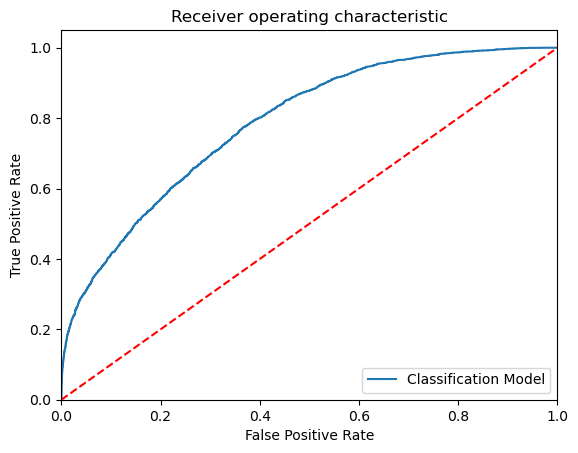

-----------------------------------------------------------------------------------------------------


In [30]:
#confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predicted  values
predicted=y_pred
#confusin matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion_matrix:\n",matrix)
#outcomes values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:\n",tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [31]:
#compare classification algorithms
#load the results
KNN_Results=pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\KNN_Results.csv",header=0)
#display first 5 records
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1768 1652]
 [1710 9523]]
Outcome values : 
 1768 1652 1710 9523
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.52      0.51      3420
           0       0.85      0.85      0.85     11233

    accuracy                           0.77     14653
   macro avg       0.68      0.68      0.68     14653
weighted avg       0.77      0.77      0.77     14653

Accuracy : 77.1 %
Precision : 50.8 %
Recall : 51.7 %
F1 Score : 0.513
Specificity or True Negative Rate : 84.8 %
Balanced Accuracy : 68.2 %
MCC : 0.363
roc_auc_score: 0.682


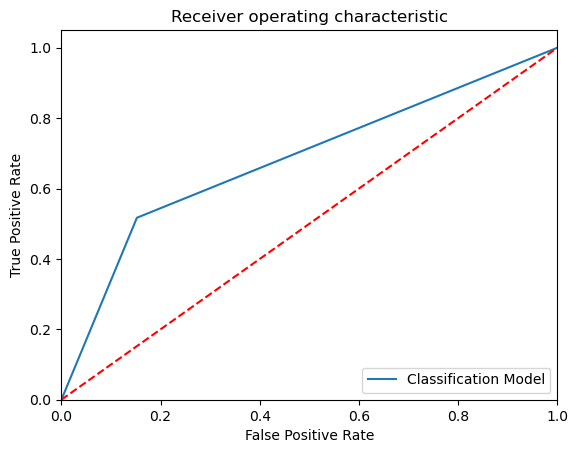

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1164  2256]
 [  617 10616]]
Outcome values : 
 1164 2256 617 10616
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.34      0.45      3420
           0       0.82      0.95      0.88     11233

    accuracy                           0.80     14653
   macro avg       0.74      0.64      0.66     14653
weighted avg       0.78      0.80      0.78     14653

Accuracy : 80.4 %
Precision : 65.4 %
Recall : 34.0 %
F1 Score : 0.448
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 64.2 %
MCC : 0.369
roc_auc_score: 0.643


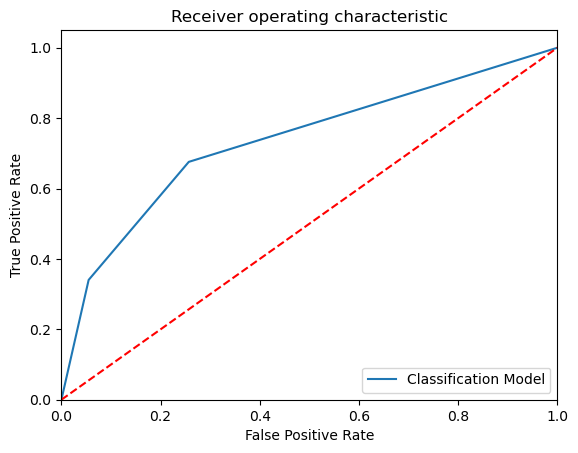

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[1695 1725]
 [1248 9985]]
Outcome values : 
 1695 1725 1248 9985
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.50      0.53      3420
           0       0.85      0.89      0.87     11233

    accuracy                           0.80     14653
   macro avg       0.71      0.69      0.70     14653
weighted avg       0.79      0.80      0.79     14653

Accuracy : 79.7 %
Precision : 57.6 %
Recall : 49.6 %
F1 Score : 0.533
Specificity or True Negative Rate : 88.9 %
Balanced Accuracy : 69.2 %
MCC : 0.406
roc_auc_score: 0.692


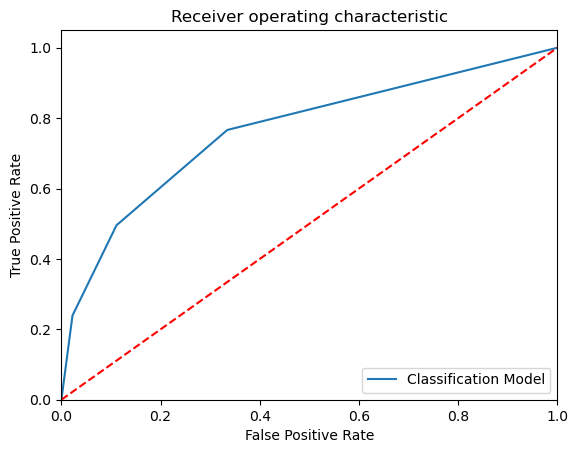

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1272  2148]
 [  626 10607]]
Outcome values : 
 1272 2148 626 10607
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.37      0.48      3420
           0       0.83      0.94      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.66      0.68     14653
weighted avg       0.79      0.81      0.79     14653

Accuracy : 81.1 %
Precision : 67.0 %
Recall : 37.2 %
F1 Score : 0.478
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 65.8 %
MCC : 0.398
roc_auc_score: 0.658


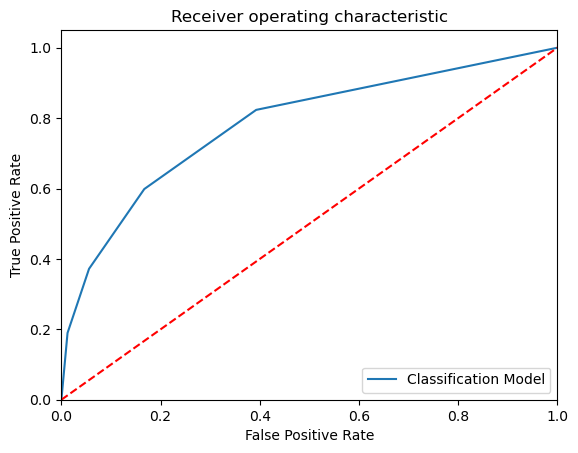

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1621  1799]
 [ 1114 10119]]
Outcome values : 
 1621 1799 1114 10119
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.47      0.53      3420
           0       0.85      0.90      0.87     11233

    accuracy                           0.80     14653
   macro avg       0.72      0.69      0.70     14653
weighted avg       0.79      0.80      0.79     14653

Accuracy : 80.1 %
Precision : 59.3 %
Recall : 47.4 %
F1 Score : 0.527
Specificity or True Negative Rate : 90.1 %
Balanced Accuracy : 68.8 %
MCC : 0.407
roc_auc_score: 0.687


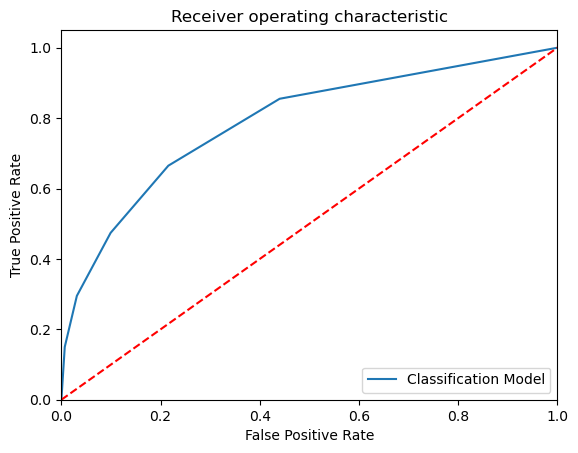

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1315  2105]
 [  698 10535]]
Outcome values : 
 1315 2105 698 10535
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.38      0.48      3420
           0       0.83      0.94      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.74      0.66      0.68     14653
weighted avg       0.79      0.81      0.79     14653

Accuracy : 80.9 %
Precision : 65.3 %
Recall : 38.5 %
F1 Score : 0.484
Specificity or True Negative Rate : 93.8 %
Balanced Accuracy : 66.2 %
MCC : 0.396
roc_auc_score: 0.661


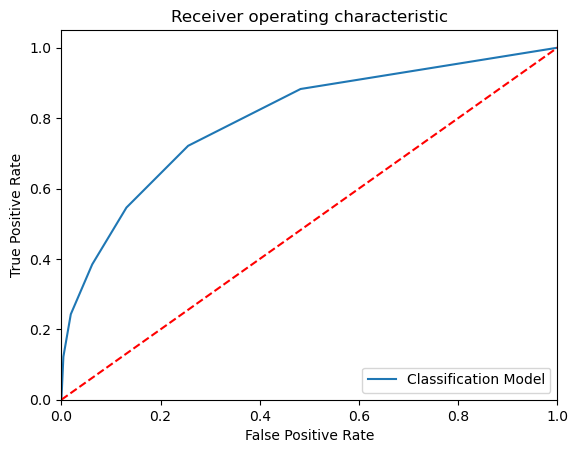

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 1579  1841]
 [ 1015 10218]]
Outcome values : 
 1579 1841 1015 10218
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.46      0.53      3420
           0       0.85      0.91      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.73      0.69      0.70     14653
weighted avg       0.79      0.81      0.80     14653

Accuracy : 80.5 %
Precision : 60.9 %
Recall : 46.2 %
F1 Score : 0.525
Specificity or True Negative Rate : 91.0 %
Balanced Accuracy : 68.6 %
MCC : 0.412
roc_auc_score: 0.686


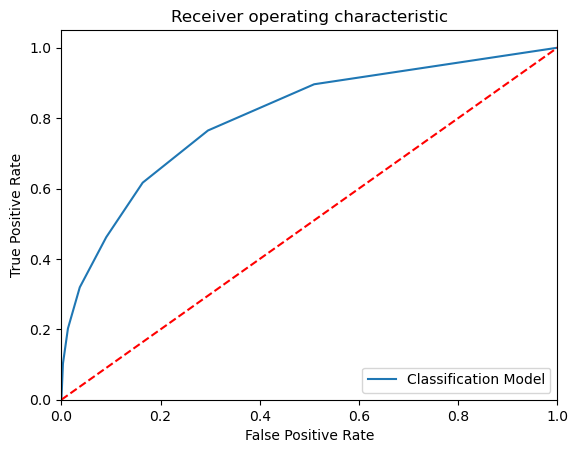

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1348  2072]
 [  674 10559]]
Outcome values : 
 1348 2072 674 10559
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.39      0.50      3420
           0       0.84      0.94      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.69     14653
weighted avg       0.80      0.81      0.79     14653

Accuracy : 81.3 %
Precision : 66.7 %
Recall : 39.4 %
F1 Score : 0.495
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 66.7 %
MCC : 0.41
roc_auc_score: 0.667


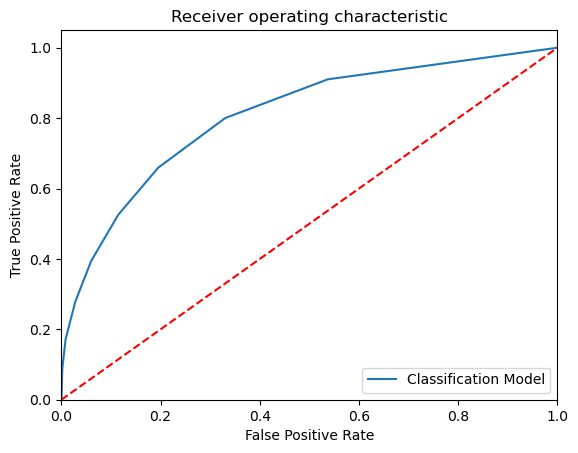

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 1562  1858]
 [  933 10300]]
Outcome values : 
 1562 1858 933 10300
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.46      0.53      3420
           0       0.85      0.92      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.74      0.69      0.70     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.0 %
Precision : 62.6 %
Recall : 45.7 %
F1 Score : 0.528
Specificity or True Negative Rate : 91.7 %
Balanced Accuracy : 68.7 %
MCC : 0.421
roc_auc_score: 0.687


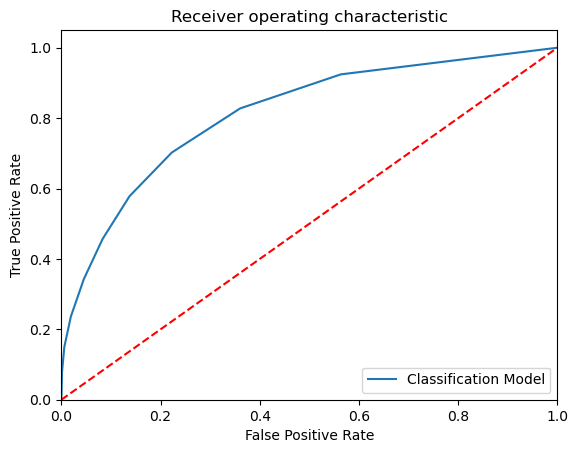

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1387  2033]
 [  685 10548]]
Outcome values : 
 1387 2033 685 10548
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.41      0.51      3420
           0       0.84      0.94      0.89     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.70     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.5 %
Precision : 66.9 %
Recall : 40.6 %
F1 Score : 0.505
Specificity or True Negative Rate : 93.9 %
Balanced Accuracy : 67.2 %
MCC : 0.418
roc_auc_score: 0.672


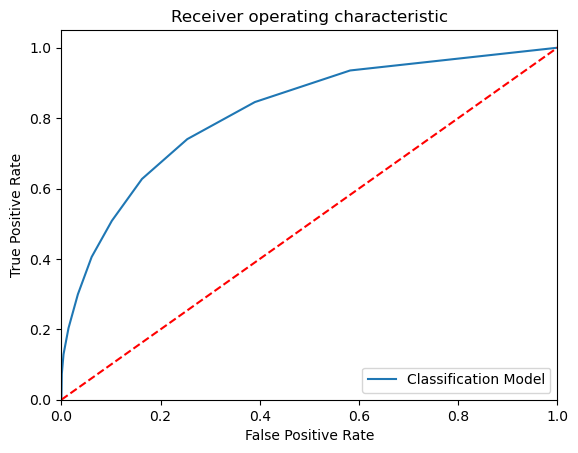

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 1542  1878]
 [  866 10367]]
Outcome values : 
 1542 1878 866 10367
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.45      0.53      3420
           0       0.85      0.92      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.74      0.69      0.71     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.3 %
Precision : 64.0 %
Recall : 45.1 %
F1 Score : 0.529
Specificity or True Negative Rate : 92.3 %
Balanced Accuracy : 68.7 %
MCC : 0.427
roc_auc_score: 0.687


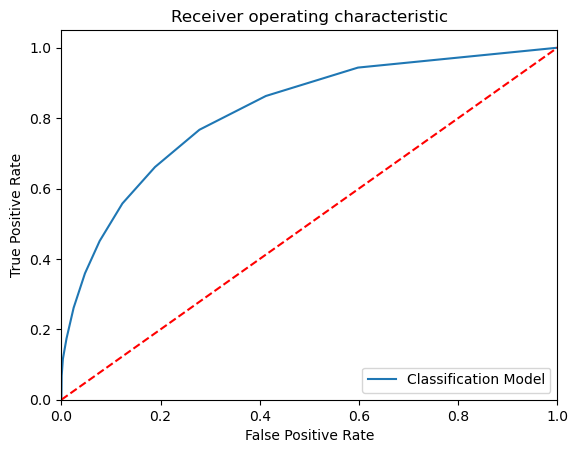

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1373  2047]
 [  679 10554]]
Outcome values : 
 1373 2047 679 10554
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.40      0.50      3420
           0       0.84      0.94      0.89     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.69     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.4 %
Precision : 66.9 %
Recall : 40.1 %
F1 Score : 0.502
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 67.0 %
MCC : 0.416
roc_auc_score: 0.671


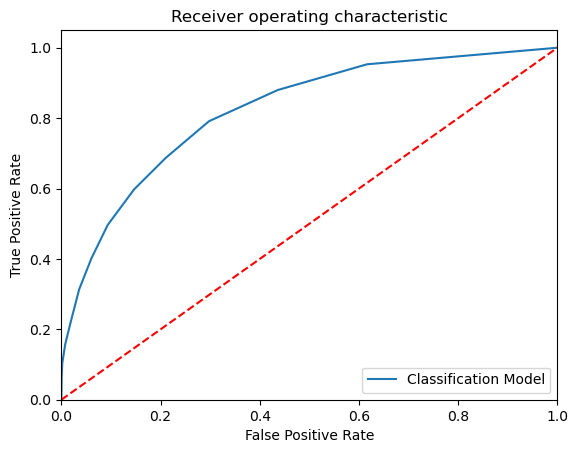

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 1527  1893]
 [  816 10417]]
Outcome values : 
 1527 1893 816 10417
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.45      0.53      3420
           0       0.85      0.93      0.88     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.69      0.71     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.5 %
Precision : 65.2 %
Recall : 44.6 %
F1 Score : 0.53
Specificity or True Negative Rate : 92.7 %
Balanced Accuracy : 68.6 %
MCC : 0.431
roc_auc_score: 0.687


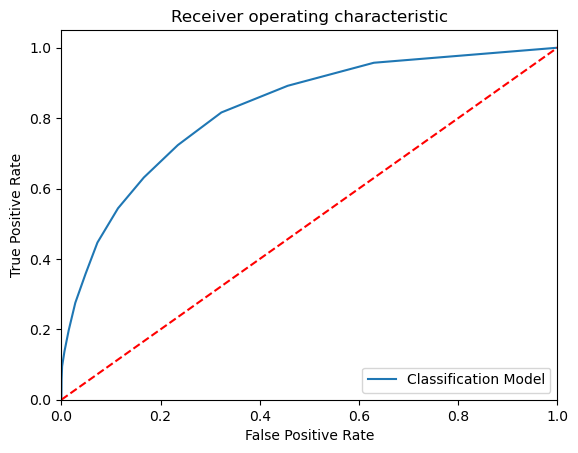

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1384  2036]
 [  678 10555]]
Outcome values : 
 1384 2036 678 10555
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.40      0.50      3420
           0       0.84      0.94      0.89     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.70     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.5 %
Precision : 67.1 %
Recall : 40.5 %
F1 Score : 0.505
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 67.2 %
MCC : 0.419
roc_auc_score: 0.672


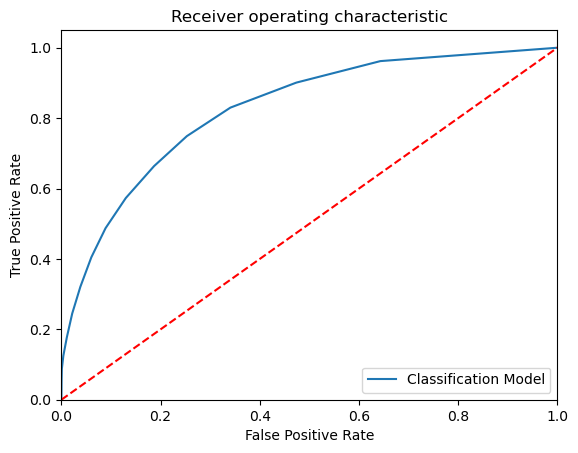

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1520  1900]
 [  814 10419]]
Outcome values : 
 1520 1900 814 10419
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.44      0.53      3420
           0       0.85      0.93      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.69      0.71     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.5 %
Precision : 65.1 %
Recall : 44.4 %
F1 Score : 0.528
Specificity or True Negative Rate : 92.8 %
Balanced Accuracy : 68.6 %
MCC : 0.43
roc_auc_score: 0.686


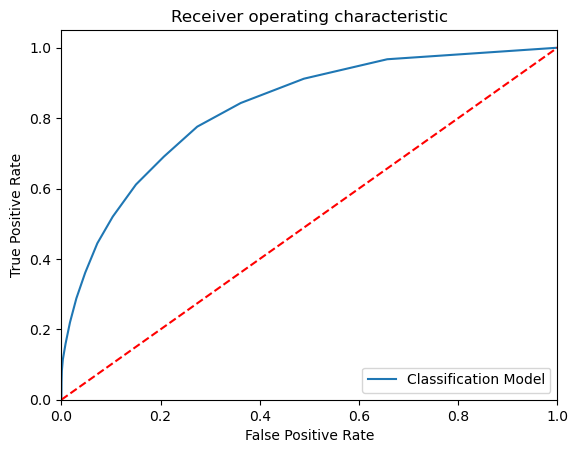

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1360  2060]
 [  674 10559]]
Outcome values : 
 1360 2060 674 10559
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.40      0.50      3420
           0       0.84      0.94      0.89     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.69     14653
weighted avg       0.80      0.81      0.80     14653

Accuracy : 81.3 %
Precision : 66.9 %
Recall : 39.8 %
F1 Score : 0.499
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 66.9 %
MCC : 0.413
roc_auc_score: 0.669


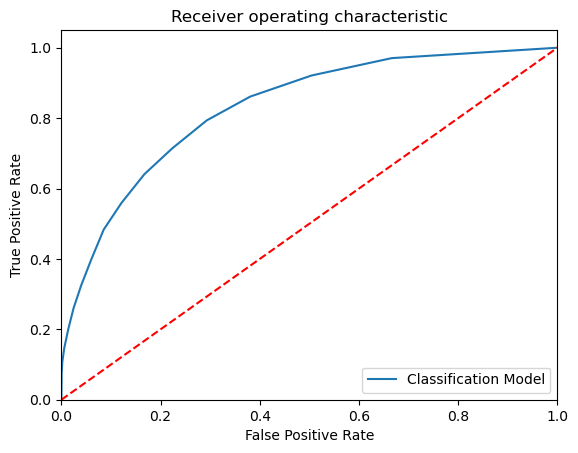

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1506  1914]
 [  795 10438]]
Outcome values : 
 1506 1914 795 10438
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.44      0.53      3420
           0       0.85      0.93      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.68      0.71     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.5 %
Precision : 65.4 %
Recall : 44.0 %
F1 Score : 0.526
Specificity or True Negative Rate : 92.9 %
Balanced Accuracy : 68.4 %
MCC : 0.43
roc_auc_score: 0.685


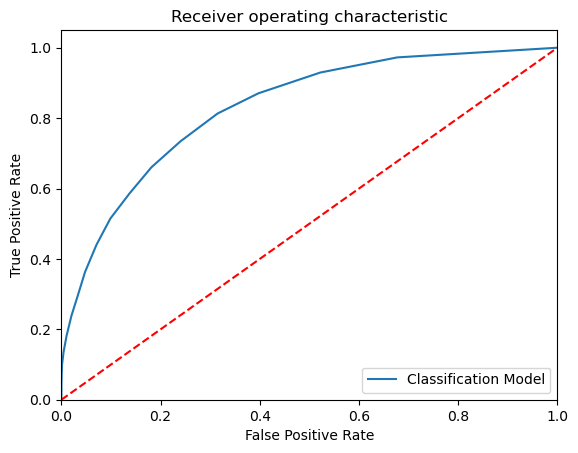

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1362  2058]
 [  649 10584]]
Outcome values : 
 1362 2058 649 10584
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.40      0.50      3420
           0       0.84      0.94      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.76      0.67      0.69     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.5 %
Precision : 67.7 %
Recall : 39.8 %
F1 Score : 0.502
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 67.0 %
MCC : 0.419
roc_auc_score: 0.67


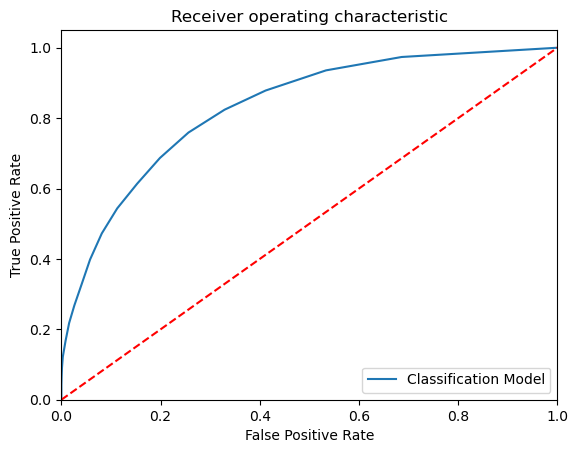

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1476  1944]
 [  761 10472]]
Outcome values : 
 1476 1944 761 10472
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.43      0.52      3420
           0       0.84      0.93      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.68      0.70     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.5 %
Precision : 66.0 %
Recall : 43.2 %
F1 Score : 0.522
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 68.2 %
MCC : 0.428
roc_auc_score: 0.682


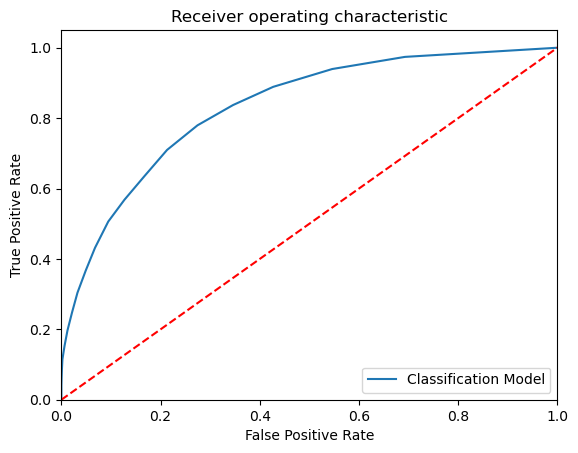

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1372  2048]
 [  645 10588]]
Outcome values : 
 1372 2048 645 10588
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.40      0.50      3420
           0       0.84      0.94      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.76      0.67      0.70     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.6 %
Precision : 68.0 %
Recall : 40.1 %
F1 Score : 0.505
Specificity or True Negative Rate : 94.3 %
Balanced Accuracy : 67.2 %
MCC : 0.422
roc_auc_score: 0.672


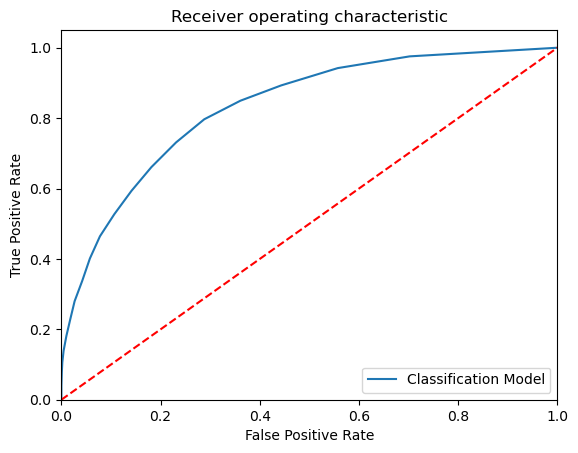

In [32]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [33]:
#SVM MODEL
#load the results
EM_Results=pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\EMResults.csv",header=0)
#display first 5 records
EM_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  940  2480]
 [  389 10844]]
Outcome values : 
 940 2480 389 10844
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.27      0.40      3420
           0       0.81      0.97      0.88     11233

    accuracy                           0.80     14653
   macro avg       0.76      0.62      0.64     14653
weighted avg       0.79      0.80      0.77     14653

Accuracy : 80.4 %
Precision : 70.7 %
Recall : 27.5 %
F1 Score : 0.396
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 62.0 %
MCC : 0.354
roc_auc_score: 0.62


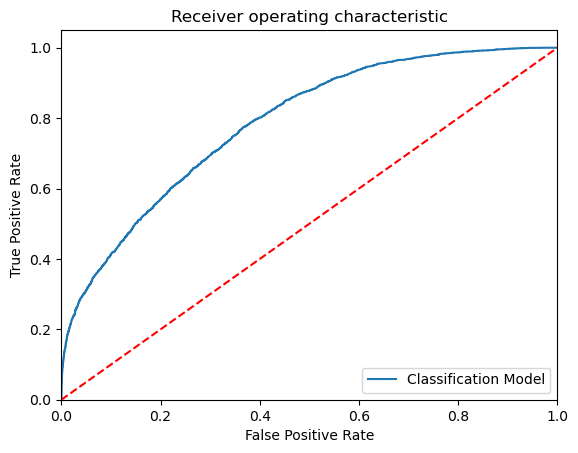

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1851 1569]
 [1308 9925]]
Outcome values : 
 1851 1569 1308 9925
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.54      0.56      3420
           0       0.86      0.88      0.87     11233

    accuracy                           0.80     14653
   macro avg       0.72      0.71      0.72     14653
weighted avg       0.80      0.80      0.80     14653

Accuracy : 80.4 %
Precision : 58.6 %
Recall : 54.1 %
F1 Score : 0.563
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 71.2 %
MCC : 0.437
roc_auc_score: 0.712


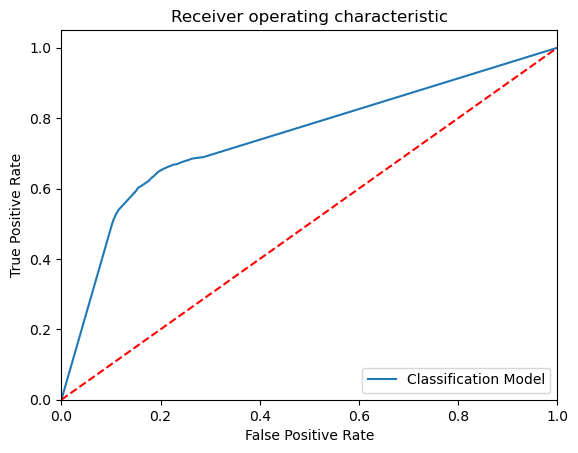

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1852  1568]
 [  995 10238]]
Outcome values : 
 1852 1568 995 10238
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.54      0.59      3420
           0       0.87      0.91      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.76      0.73      0.74     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy : 82.5 %
Precision : 65.1 %
Recall : 54.2 %
F1 Score : 0.591
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 72.6 %
MCC : 0.484
roc_auc_score: 0.726


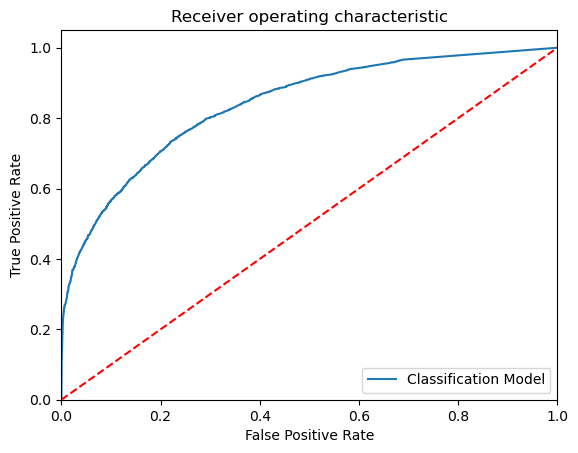

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1766  1654]
 [ 1005 10228]]
Outcome values : 
 1766 1654 1005 10228
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.52      0.57      3420
           0       0.86      0.91      0.88     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.71      0.73     14653
weighted avg       0.81      0.82      0.81     14653

Accuracy : 81.9 %
Precision : 63.7 %
Recall : 51.6 %
F1 Score : 0.571
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 71.4 %
MCC : 0.461
roc_auc_score: 0.713


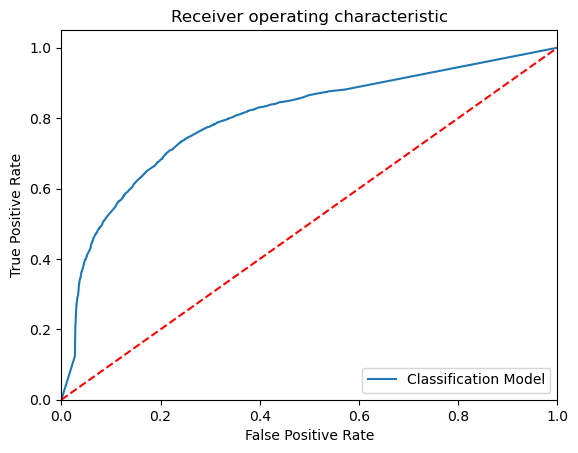

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1621  1799]
 [ 1114 10119]]
Outcome values : 
 1621 1799 1114 10119
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.47      0.53      3420
           0       0.85      0.90      0.87     11233

    accuracy                           0.80     14653
   macro avg       0.72      0.69      0.70     14653
weighted avg       0.79      0.80      0.79     14653

Accuracy : 80.1 %
Precision : 59.3 %
Recall : 47.4 %
F1 Score : 0.527
Specificity or True Negative Rate : 90.1 %
Balanced Accuracy : 68.8 %
MCC : 0.407
roc_auc_score: 0.687


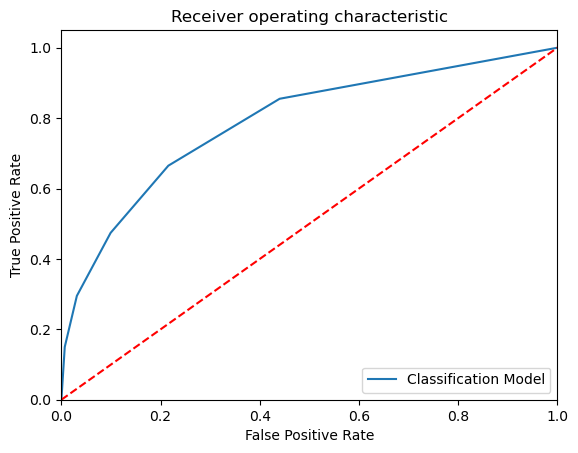

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1067  2353]
 [  573 10660]]
Outcome values : 
 1067 2353 573 10660
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.31      0.42      3420
           0       0.82      0.95      0.88     11233

    accuracy                           0.80     14653
   macro avg       0.73      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653

Accuracy : 80.0 %
Precision : 65.1 %
Recall : 31.2 %
F1 Score : 0.422
Specificity or True Negative Rate : 94.9 %
Balanced Accuracy : 63.0 %
MCC : 0.35
roc_auc_score: 0.63


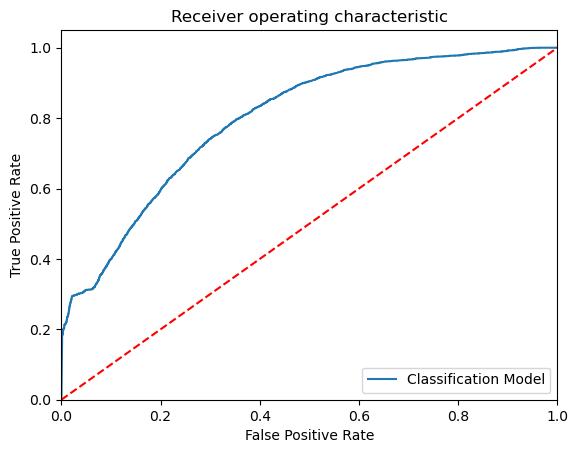

-----------------------------------------------------------------------------------------------------


In [34]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EM_Results = EM_Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [35]:
EM_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),940,2480,389,10844,0.804,0.707,0.275,0.396,0.965,0.354,0.620112,0.620
1,DecisionTreeClassifier(),1851,1569,1308,9925,0.804,0.586,0.541,0.563,0.884,0.437,0.712393,0.712
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1852,1568,995,10238,0.825,0.651,0.542,0.591,0.911,0.484,0.726471,0.726
3,"(ExtraTreeClassifier(random_state=635435500), ...",1766,1654,1005,10228,0.819,0.637,0.516,0.571,0.911,0.461,0.713453,0.714
4,KNeighborsClassifier(),1621,1799,1114,10119,0.801,0.593,0.474,0.527,0.901,0.407,0.687402,0.688
5,GaussianNB(),1067,2353,573,10660,0.800,0.651,0.312,0.422,0.949,0.350,0.630489,0.630


In [36]:
y_predRF=ModelRF.predict(x_test)

In [37]:
#display the final results 
Results = pd.DataFrame({'income_A':y_test, 'income_P_F':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = addata_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
#ResultsFinal['%Error'] = round(((ResultsFinal['CSinMPa_A']-ResultsFinal['CSinMPa_P'])/ResultsFinal['CSinMPa_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(10)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_A,income_P_F
28638,28639,30,Private,164190,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1,0
48713,48714,36,Private,208068,Preschool,1,Divorced,Other-service,Not-in-family,Other,Male,0,0,72,Mexico,<=50K,0,0
31772,31773,19,Private,195985,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K,0,0
7687,7688,17,Private,98005,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,0,0
39120,39121,42,Private,412379,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K,0,0
13618,13619,36,Local-gov,161132,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,56,United-States,<=50K,0,0
45370,45371,36,Private,247321,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K,0,0
16612,16613,26,Private,224563,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
5907,5908,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1,0
16729,16730,20,Private,146538,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0,0


In [50]:
import pickle

In [51]:
pickle.dump(ModelDC,open('cls1.pkl','wb'))

In [52]:
pi_mo=pickle.load(open('cls1.pkl','rb'))

In [60]:
import pandas as pd
import pickle

# Load your trained model
loaded_model = pickle.load(open('cls1.pkl', 'rb'))

# Assuming 'new_data' is your new dataset for prediction, with the same structure as 'X'
# Example: Creating 'new_data' DataFrame
new_data = pd.DataFrame({
    'age': [30, 45, 25],
    'workclass': [4, 2, 1],
    'education': [7, 11, 15],
    'occupation': [7, 5, 3],
    'capital-gain': [0, 5000, 0],
    'capital-loss': [0, 0, 1000],
    'hours-per-week': [40, 50, 35]
})

# Make predictions
predictions = loaded_model.predict(new_data)
print(predictions)


[0 1 1]


In [40]:
# IN ORDER TO INCREASE PERFORMANCE OF MODEL IT IS BENEFICIAL TO USE TUNING TECHNIQUES FOR BETTER ACCURACY .
# THE ABOVE MODEL SHOWS THE INCOME PREDICTION OF AN INDIVIDUAL BASED ON DEMOGRAPHIC AND ECONOMIC FEATURES AND 
# SUGGESTS THE INCOME LEVEL WHEN PROVIDED THE NEW DATA 
#THE ABOVE MODEL PREDICTED CAN BE USED FOR THE FOLLOWING PURPOSES (USE CASES):
  #Financial Decision Making
  #Targeted Marketing and Sales
  #Socioeconomic Studies
  #Market Research and Consumer Behavior Analysis
  #Employee Compensation and Benefits
  #Risk Assessment
  #Economic Policy Development
